https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
array = np.arange(100) +1

In [7]:
p = 5

In [8]:
array[len(array)-p:]

array([ 96,  97,  98,  99, 100])

In [9]:
def calculate_alphas(data, p):
    y = data[p:]
    rows = len(data) - p
    cols = p + 1
    x = np.ones((rows, cols))
    for i in range(rows):
        x[i, 1:] = data[i:p+i][::-1]
    
    x_plus = np.linalg.pinv(x)
    a = x_plus.dot(y)
    
    return a

In [10]:
p = 3

In [11]:
size = len(array)

In [12]:
values = array[size-p:]

In [13]:
a = calculate_alphas(values, p)

In [14]:
a

array([0., 0., 0., 0.])

In [15]:
x

NameError: name 'x' is not defined

In [ ]:
def predict(data, p):
    """ receives only the previous points and returns the predicted value based on the previous p points"""
    size = len(data)
    a = calculate_alphas(data, p)
    prev_values = np.ones(p+1)
    prev_values[1:] = data[:size-p-1:-1]
    y_pred = prev_values.dot(a)
    return y_pred

In [ ]:
def plot_results(data, p):
    print('Real value:', data[-1])
    y_pred = predict(data[:-1], p)
    print('Predicted value:', y_pred)
    x_axis = np.arange(len(data))
    plt.scatter(x_axis, data, label='real values')
    x_axis_pred = len(data)
    plt.scatter(x_axis_pred, y_pred, color='r', label='predicted values')
    plt.legend()
    plt.show()

In [ ]:
array[-1]

100

Real value: 100
Predicted value: 99.99999999999994


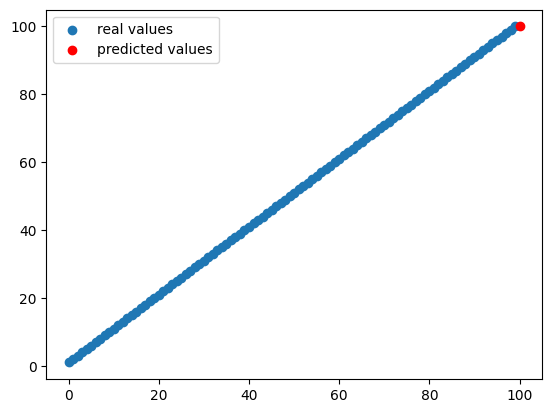

In [ ]:
plot_results(array, 5)

### Linear regression based on prev and pots values

In [ ]:
index = 50

In [ ]:
real_value = array[index]
real_value

51

In [ ]:
prev_data = array[:index]
prev_data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
post_data = array[index+1:]
post_data

array([ 52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
p_value = 5

In [ ]:
prev_pred = predict(prev_data, p_value)
prev_pred

51.0

In [ ]:
post_pred = predict(post_data[::-1], p_value)
post_pred

50.999999999999936

In [ ]:
predicted_value = (prev_pred + post_pred) / 2
predicted_value

50.99999999999997

In [ ]:
def predict_in_the_middle(data_all, p, split_index):
    if split_index == len(data_all)-1:
        # predict the last index of the data
        return predict(data_all[:-1], p)
    if split_index == 0:
        # predict the first index of the data
        return predict(data_all[1:][::-1], p)
    if len(data_all) - split_index - 1< p + 1 or split_index < p + 1:
        print('Invalid split index')
        return None

    prev_data = data_all[:split_index]
    post_data = data_all[split_index+1:]

    prev_pred = predict(prev_data, p_value)
    post_pred = predict(post_data[::-1], p_value)

    return (prev_pred + post_pred) / 2 # mean of the two predictions


In [ ]:
predict_in_the_middle(array, 5, 3)

Invalid split index


In [ ]:
def rmse (y_real, y_pred):
    """https://www.askpython.com/python/examples/rmse-root-mean-square-error"""
    mse = np.square(y_real - y_pred).mean()
    return np.sqrt(mse)

In [17]:
def define_best_p_value(data, index_first_outlier, min_p_value= 2, max_step=90, step=10):
    """Leave one-out technique to determine the best number of previous values to predict a value"""
    p_possible_values = range(min_p_value, max_step, step)
    real_value = data[index_first_outlier]
    errors = []
    for p in p_possible_values:
        y_pred = predict(data[:index_first_outlier], p)
        print('P: ', p)
        print('Real: ', real_value)
        print('Pred: ', y_pred)
        errors.append(rmse(real_value, y_pred))

    
    plt.figure()
    plt.plot(p_possible_values, errors, '*')
    plt.xlabel('Previous p values')
    plt.ylabel('RMSE')
    plt.title('Errors obtained with RMSE using the Leave-one-out technique to determine the best p value')
    plt.show()
    

In [18]:
define_best_p_value(array, 98)

NameError: name 'predict' is not defined